In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def output_fidelity(F_in):
    """ Returns output fidelity of BBPSSW protocol.
    
    Keyword arguments:
    F_in -- input fidelity
    """
    F_out = (np.square(F_in) + np.square(1-F_in)/9) \
            / (np.square(F_in) + 2*F_in*(1-F_in)/3 + 5*np.square(1-F_in)/9)
 
    return F_out

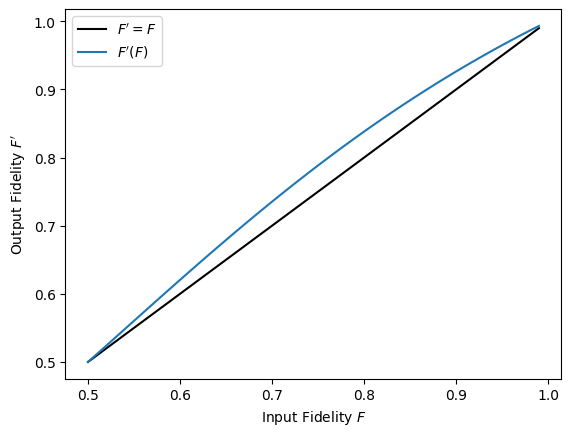

In [3]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

In [4]:
# Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Import Parameter class
from qiskit.circuit import Parameter

In [5]:
from copy import deepcopy
from math import pi


In [6]:
phi_plus = np.array([1, 0, 0, 1])/np.sqrt(2)   # | Phi^+ >
phi_minus = np.array([1, 0, 0, -1])/np.sqrt(2) # | Phi^- >
psi_plus = np.array([0, 1, 1, 0])/np.sqrt(2)   # | Psi^+ >
psi_minus = np.array([0, 1, -1, 0])/np.sqrt(2) # | Psi^- >

In [7]:
def Werner_state(F):
    """Returns Werner state of fidelity F.
    
    Keyword arguments:
    F -- fidelity of Werner state, range [0, 1]
    """
    if F < 0 or F > 1:
        raise Exception('Fidelity must be between 0 and 1.')
    
    state = F*np.outer(psi_minus, psi_minus.conj().T) \
            + (1 - F)/3*(np.outer(phi_plus, phi_plus.conj().T) \
                        + np.outer(phi_minus, phi_minus.conj().T) \
                        + np.outer(psi_plus, psi_plus.conj().T))
    
    return state

In [8]:
qr = QuantumRegister(4)

In [9]:
def F_to_theta(F):
    """Returns the angle theta corresponding to an input fidelity F.
    
    Keyword arguments:
    F -- fidelity between 0 and 1
    """
    if F < 0 or F > 1:
        raise Exception('Fidelity must be between 0 and 1.')
    else:
        theta = np.arcsin(2*F - 1)
    
    return theta

In [10]:
source_circ = QuantumCircuit(qr)

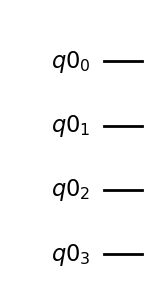

In [11]:
source_circ.draw(output='mpl')

In [12]:
source_circ.x(qr[1]);

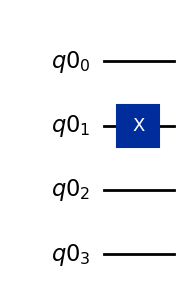

In [13]:
source_circ.draw(output='mpl')

In [14]:
# Create a parameter theta
#theta = Parameter('theta')
theta = pi/3

# Implement a parametrized single-qubit gate u on qubit 0
source_circ.u(theta, pi, 0, qr[0])

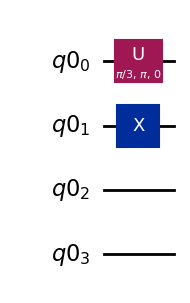

In [15]:
source_circ.draw(output='mpl')

In [129]:
# Implement a CNOT between qubit 0 as control qubit and qubit 1 as target qubit
source_circ.cx(qr[0], qr[1]);

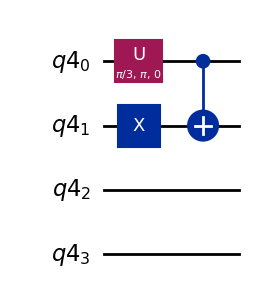

In [130]:
source_circ.draw(output='mpl')

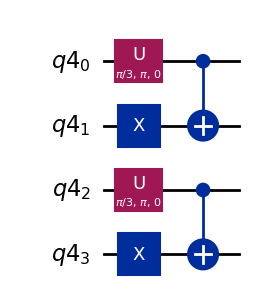

In [131]:
# Implement a Pauli-X gate on qubit 3
source_circ.x(qr[3])

# Implement a single-qubit gate u on qubit 2
source_circ.u(theta, pi , 0, qr[2])

# Implement a CNOT between qubit 2 as control qubit and qubit 3 as target qubit
source_circ.cx(qr[2], qr[3]);

source_circ.draw(output='mpl')

In [132]:
control_qubits = [qr[0], qr[1]]
target_qubits = [qr[2], qr[3]]

In [133]:
twirl_circ = QuantumCircuit(qr)

In [134]:
def bilateral_rotation(circuit, qubits, rot_idx):
    """Adds a bilateral rotation to a quantum circuit.
    
    Keyword arguments:
    circuit --  quantum circuit to which the rotations are added
    qubits -- alist of qubits, each of which is rotated
    rot_idx -- integer that numbers the rotations from the set of all rotations, ranges from 0 to 11
    """
    for qubit in qubits:
        if rot_idx == 0:
            pass
        
        elif rot_idx == 1:
            circuit.rx(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        elif rot_idx == 2:
            circuit.ry(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            
        elif rot_idx == 3:
            circuit.rz(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            
        elif rot_idx == 4:
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            
        elif rot_idx == 5:
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            
        elif rot_idx == 6:
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        elif rot_idx == 7:
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        elif rot_idx == 8:
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            
        elif rot_idx == 9:
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            
        elif rot_idx == 10:
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        elif rot_idx == 11:
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        else:
            raise Exception('Input argument rot_idx has to be an integer between 0 and 11.')

In [135]:
# Create a random integer between 0 and 11
random_idx = np.random.randint(12)

# Add a random bilateral rotation to the circuit, applied to qubits 0 and 1 (control qubits)
bilateral_rotation(twirl_circ, control_qubits, random_idx)

# Add a random bilateral rotation to the circuit, applied to qubits 2 and 3 (target qubits)
bilateral_rotation(twirl_circ, target_qubits, random_idx)


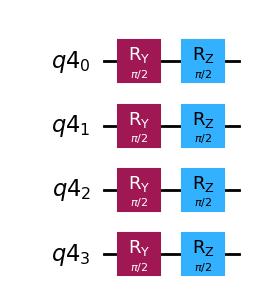

In [136]:
twirl_circ.draw(output='mpl')

In [137]:
purification_circ = QuantumCircuit(qr)

# Implement a Pauli-Y gate on Alice's control qubit
purification_circ.y(control_qubits[0])

# Implement a Pauli-Y gate on Alice's target qubit
purification_circ.y(target_qubits[0]);

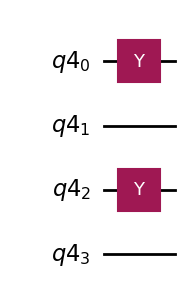

In [138]:
purification_circ.draw(output='mpl')

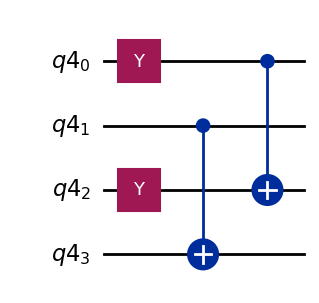

In [139]:
for i in range(2):
    purification_circ.cx(control_qubits[i], target_qubits[i])

purification_circ.draw(output='mpl')

In [140]:
# experiment_circ = source_circ + twirl_circ + purification_circ

experiment_circ = QuantumCircuit(qr)
experiment_circ.compose(source_circ, [0, 1, 2, 3], inplace=True)
experiment_circ.compose(twirl_circ, [0, 1, 2, 3], inplace=True)
experiment_circ.compose(purification_circ, [0, 1, 2, 3], inplace=True)

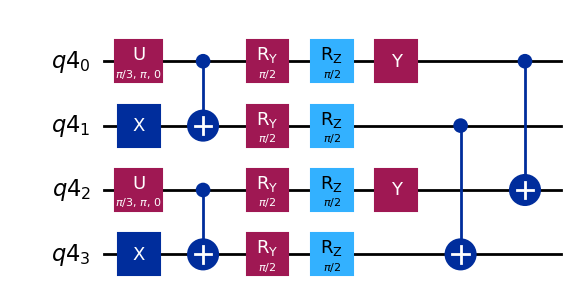

In [141]:
experiment_circ.draw(output='mpl')

In [142]:
from qiskit_experiments.library.tomography import StateTomography, StateTomographyAnalysis

In [143]:
tomography_circs = StateTomography(experiment_circ, control_qubits)

In [144]:
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import GenericBackendV2

# Generate a 5-qubit simulated backend
backend = GenericBackendV2(num_qubits=7)

backend = AerSimulator.from_backend(backend)

In [146]:
qstdata1 = tomography_circs.run(backend, seed_simulation=100).block_for_results()

# Print results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[ 1.95312046e-01+0.00000000e+00j,
                -9.63525161e-03-3.51421317e-03j,
                -1.36174522e-02-4.43805409e-03j,
                 1.90383711e-01+6.76274214e-04j,
                 1.60486740e-03-5.49437866e-02j,
                -5.17954121e-04-5.35620164e-02j,
                 3.30575150e-03+5.19736546e-02j,
                 1.19787188e-03+5.31829189e-02j,
                 3.85338566e-03+5.20886892e-02j,
                 3.40835260e-03-5.19253493e-02j,
                 2.42218161e-03+5.24472235e-02j,
                 1.17792319e-03-5.22428253e-02j,
                 1.86699905e-01+4.89164121e-03j,
                 1.07913390e-02-4.79619084e-03j,
                 1.15322209e-02+7.15747267e-04j,
                 1.83888762e-01+5.79014805e-04j],
               [-9.63525161e-03+3.51421317e-03j,
                 5.88766175e-03+1.67075141e-20j,
                 5.02391522e-04-9.77797210e-04j,
                -1.28130263e-0

In [149]:
state_result = qstdata1.analysis_results("state")
print(state_result.value)

DensityMatrix([[ 1.95312046e-01+0.00000000e+00j,
                -9.63525161e-03-3.51421317e-03j,
                -1.36174522e-02-4.43805409e-03j,
                 1.90383711e-01+6.76274214e-04j,
                 1.60486740e-03-5.49437866e-02j,
                -5.17954121e-04-5.35620164e-02j,
                 3.30575150e-03+5.19736546e-02j,
                 1.19787188e-03+5.31829189e-02j,
                 3.85338566e-03+5.20886892e-02j,
                 3.40835260e-03-5.19253493e-02j,
                 2.42218161e-03+5.24472235e-02j,
                 1.17792319e-03-5.22428253e-02j,
                 1.86699905e-01+4.89164121e-03j,
                 1.07913390e-02-4.79619084e-03j,
                 1.15322209e-02+7.15747267e-04j,
                 1.83888762e-01+5.79014805e-04j],
               [-9.63525161e-03+3.51421317e-03j,
                 5.88766175e-03+1.67075141e-20j,
                 5.02391522e-04-9.77797210e-04j,
                -1.28130263e-02+4.94712771e-03j,
                -5.

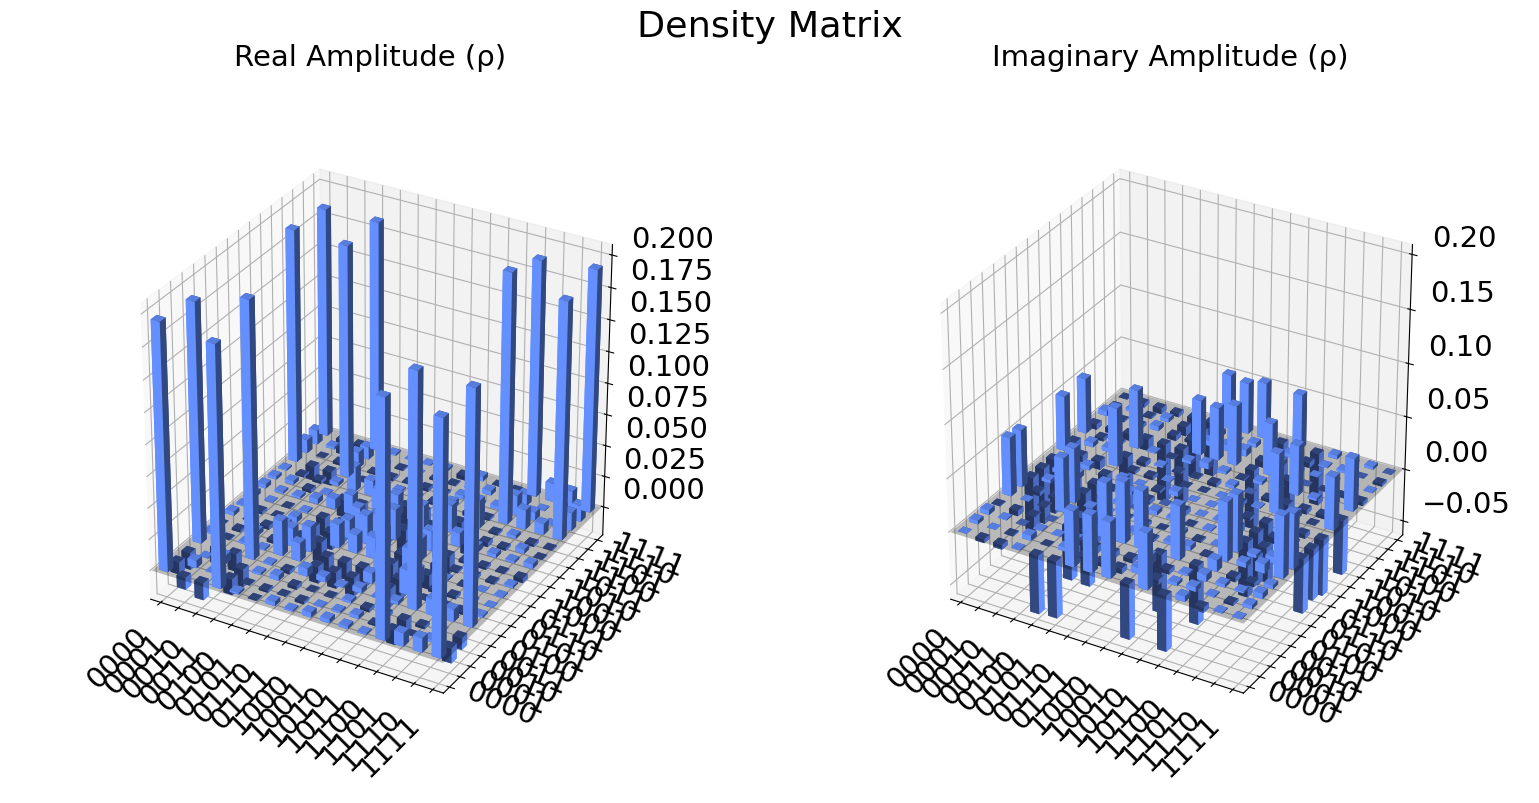

In [150]:
from qiskit.visualization import plot_state_city
plot_state_city(qstdata1.analysis_results("state").value, title='Density Matrix')

In [151]:
fid_result = qstdata1.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result.value))

State Fidelity = 0.87833


In [152]:
ancilla_circ = deepcopy(experiment_circ)

In [153]:
# Create a classical register cr consisting of two bits
cr = ClassicalRegister(2)

# Add the classical register to the circuit
ancilla_circ.add_register(cr)

In [154]:
># Implement a measurement of Alice's target qubit and store the result in bit 0
ancilla_circ.measure(target_qubits[0], cr[0])

# Implement a measurement of Bob's target qubit and store the result in bit 1
ancilla_circ.measure(target_qubits[1], cr[1])

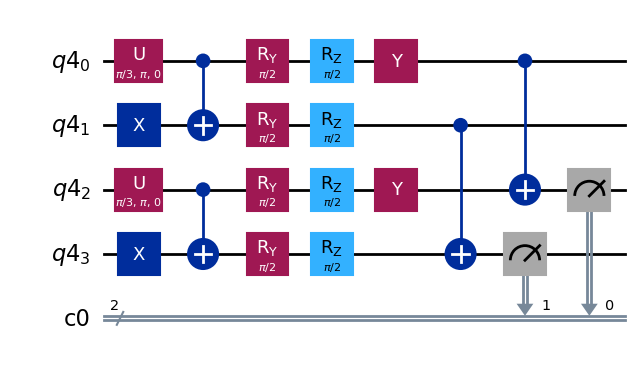

In [155]:
ancilla_circ.draw(output='mpl')